In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# import rpy2
# import rpy2.robjects as robjects
#from rpy2.robjects.packages import importr
# from sklearn.utils import resample
#from rpy2.robjects import r
#from rpy2.robjects import pandas2ri

In [8]:
kmodel = pd.read_csv('/Users/xurui/Desktop/2021.6 - 量化项目/model_data180630.csv')
kmodel.head(5)

,Unnamed: 0,fund_id,compy_id,trddy,ri,net_ri,mkt_rf,smb,hml,umd,rbrf,rf
0,0,108426,1059,2018-07-02,-1.354167,-2.854167,-0.020651,0.010108,-0.005625,-0.006219,2.219459,0.000041
1,1,108426,1059,2018-07-03,-0.941040,-2.441040,0.003170,0.017638,0.002349,-0.020758,2.120459,0.000041
2,2,108426,1059,2018-07-04,-1.258008,-2.758008,-0.014638,-0.005638,0.007827,-0.000652,1.899459,0.000041
3,3,108426,1059,2018-07-05,-1.683226,-3.183226,-0.017812,-0.011982,0.002551,0.017403,1.898259,0.000041
4,4,108426,1059,2018-07-06,0.845567,-0.654433,0.003503,0.001753,-0.003903,-0.000333,1.845059,0.000041


In [41]:
kmodel = kmodel.groupby('fund_id').filter(lambda x: (len(x) > 100))

In [42]:
funds_list = kmodel.fund_id.unique() # 基金清单

In [43]:
print("alpha:", alpha[:5],"\n","ta:",ta[:5])

alpha: [-0.10671690140977526, 0.11352756531101049, -0.036425974644221426, 0.09785749312411929, 0.10050472802564547] 
 ta: [-1.2959769498740732, 0.6743863863276223, -0.16397625118817294, 0.5485198130297815, 0.2950640857565519]


In [44]:
def res_caculator(f):
    Y = f['ri']-f['rf']
    result = sm.OLS(Y, sm.add_constant(f.loc[:, ['mkt_rf', 'smb', 'hml', 'umd', 'rbrf']])).fit() # 净值根据Cahart五因子做线性回归
    pv = result.pvalues
    y_dot = result.fittedvalues # 线性方程拟合后计算净值预测值
    res = Y - y_dot # 净值与净值预测值相减形成残差
    
    # 记录回归方程中各参数取值
    coef = {}
    coef.update(alpha_dot = result.params[0], mkt_b = result.params[1], smb_b = result.params[2], hml_b = result.params[3],
                umd_b = result.params[4], rbrf_b = result.params[5])
    
    # 返回res计算后的单支基金数据及对应的四因子回归方程系数
    return (res, coef, pv) 

In [45]:
pv_values = []
dt_length = []
for f in funds_list:
    tmp_f = kmodel[kmodel['fund_id'] == f].reset_index(drop=True)
    res_series = res_caculator(tmp_f)# EXP: len(res_series) = m, m为某基金合计数据点数量    
    f_coefs = res_series[1] 
    
    pv = res_series[2][0]
    lens = len(tmp_f)
    pv_values.append(pv)
    dt_length.append(lens)

(array([99., 59., 48., 53., 34., 32., 56., 47., 45., 48., 34., 46., 37.,
        39., 43., 43., 43., 45., 36., 47., 41., 40., 36., 44., 39., 30.,
        33., 26., 41., 37., 35., 36., 28., 43., 44., 35., 30., 34., 33.,
        30., 30., 27., 26., 37., 25., 34., 39., 27., 30., 39.]),
 array([1.37500691e-04, 2.01337856e-02, 4.01300705e-02, 6.01263554e-02,
        8.01226402e-02, 1.00118925e-01, 1.20115210e-01, 1.40111495e-01,
        1.60107780e-01, 1.80104065e-01, 2.00100350e-01, 2.20096634e-01,
        2.40092919e-01, 2.60089204e-01, 2.80085489e-01, 3.00081774e-01,
        3.20078059e-01, 3.40074344e-01, 3.60070629e-01, 3.80066914e-01,
        4.00063198e-01, 4.20059483e-01, 4.40055768e-01, 4.60052053e-01,
        4.80048338e-01, 5.00044623e-01, 5.20040908e-01, 5.40037193e-01,
        5.60033478e-01, 5.80029762e-01, 6.00026047e-01, 6.20022332e-01,
        6.40018617e-01, 6.60014902e-01, 6.80011187e-01, 7.00007472e-01,
        7.20003757e-01, 7.40000042e-01, 7.59996326e-01, 7.79992611e-

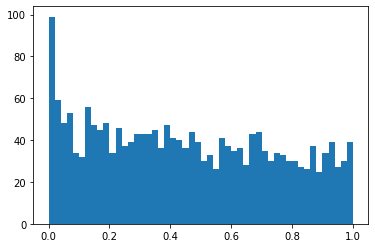

In [46]:
plt.hist(pv_values, bins = 50)

(array([4.300e+01, 5.700e+01, 3.100e+01, 4.700e+01, 4.800e+01, 3.600e+01,
        3.100e+01, 1.700e+01, 2.800e+01, 1.900e+01, 3.500e+01, 3.600e+01,
        3.000e+01, 2.500e+01, 2.100e+01, 3.400e+01, 1.414e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 101.  ,  137.78,  174.56,  211.34,  248.12,  284.9 ,  321.68,
         358.46,  395.24,  432.02,  468.8 ,  505.58,  542.36,  579.14,
         615.92,  652.7 ,  689.48,  726.26,  763.04,  799.82,  836.6 ,
         873.38,  910.16,  946.94,  983.72, 1020.5 , 1057.28, 1094.06,
        1130.84, 1167.62, 1204.4 , 1241.18, 1277.96, 1314.74, 1351.52,
        1388.3 , 1425

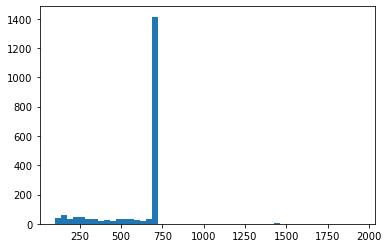

In [47]:
plt.hist(dt_length, bins = 50)

In [48]:
alpha = []
ta = []

for fund in funds_list:
    tmp_f = kmodel[kmodel['fund_id'] == fund].reset_index(drop=True)
    X = tmp_f.loc[:, 'mkt_rf':'rbrf']
    Y = tmp_f.ri - tmp_f.rf
    
    true_ols = sm.OLS(Y, sm.add_constant(X)).fit()
    alpha_i = true_ols.params[0]
    ta_i = true_ols.tvalues[0]
    
    alpha.append(alpha_i) # 每只基金的真实Alpha(使用OLS回归后的估计值)
    ta.append(ta_i) # Alpha估计值的t-value

In [49]:
def series_manipulator(alpha, ta):
    # 将两个List合并到一起，按alpha排序
    alpha = np.array(alpha).reshape(len(alpha),1)
    ta = np.array(ta).reshape(len(ta),1)

    one_fund_array = np.hstack([alpha, ta])
    one_fund_array = one_fund_array[np.argsort(one_fund_array[:,0]),:]
    
    # 将排好序的alpha和其t-value分开，变成两个二维数组
    one_fund_list = np.hsplit(one_fund_array,2)
    
    return one_fund_list  

In [50]:
series_manipulator(alpha, ta)

[array([[-4.98886672],
        [-3.07958337],
        [-3.06012209],
        ...,
        [ 6.00218322],
        [ 7.31662105],
        [ 8.51994271]]),
 array([[-1.11091827],
        [-2.60090069],
        [-2.7638921 ],
        ...,
        [ 2.31832394],
        [ 0.55203724],
        [ 2.21078316]])]

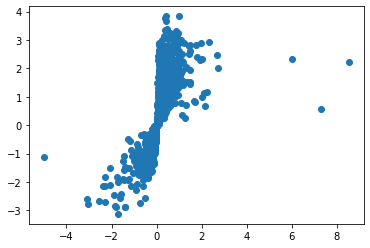

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=alpha, y=ta)

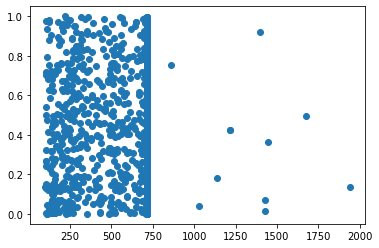

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=dt_length, y=pv_values)